# **Plotting WRF and STILT Domain**


## *Setup*

### Imports
Importing minimum needed to plot the domain of a WRF file and then a bounding box for a given STILT domain.

In [1]:
import os
from wrf import getvar, latlon_coords, get_cartopy
from netCDF4 import Dataset #type: ignore
import numpy as np
import cartopy.crs as crs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

### WRF Read-in
Reading in the WRF file and getting the projection of the WRF domain

In [2]:
wrffile = './2023/wrfout/wrfout_d02_2023-07-21_00:00:00'
wrf_ds = Dataset(wrffile)

z = getvar(wrf_ds, 'z', units='m')
cart_proj = get_cartopy(z)

### STILT Domain Setup
Setting the bounding box for the STILT domain.

In [ ]:
min_lon = -75.7
max_lon = -72.1
min_lat = 39.2
max_lat = 42.0

x = [min_lon, max_lon, max_lon, min_lon, min_lon]
y = [min_lat, min_lat, max_lat, max_lat, min_lat]

## *Plotting*


### Main Plot

Simple plot that just plots the WRF domain and the bounding box for the STILT domain.

In [ ]:
golden = (1. + np.sqrt(5.))/2.
figsize = (12., 12./golden)
fig, ax = plt.subplots(1,1, subplot_kw={'projection': cart_proj},figsize=figsize)
states = cfeature.STATES
ax.add_feature(states, linewidth=0.5, edgecolor='black')

ax.plot(x, y, color='red', transform=crs.PlateCarree())

plt.show()

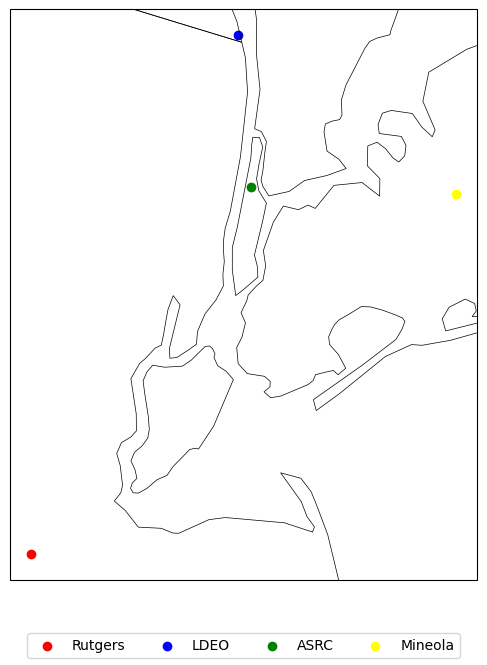

In [4]:
golden = (1. + np.sqrt(5.))/2.
figsize = (12., 12./golden)
fig, ax = plt.subplots(1,1, subplot_kw={'projection': cart_proj},figsize=figsize)
states = cfeature.STATES
ax.add_feature(states, linewidth=0.5, edgecolor='black')

ax.scatter(-74.43, 40.46,color='red',transform=crs.PlateCarree(),label='Rutgers')
ax.scatter(-73.91, 41.00,color='blue',transform=crs.PlateCarree(),label='LDEO')
ax.scatter(-73.95, 40.82,color='green',transform=crs.PlateCarree(),label='ASRC')
ax.scatter(-73.64, 40.75,color='yellow',transform=crs.PlateCarree(),label='Mineola')
fig.legend(loc='outside lower center', ncols=4)
plt.show()
